## Engineering Rare Categories

**Rare values** are categories within a categorical variable that are present only **in a small percentage of the observations**. There is no rule, but typically, any value below 5 % can be considered rare. If only on the **train set**, they may cause **over-fitting**! If only on the **test set**, our machine learning model will **not know how to score them**!

**Highly cardinal variables** tend to have **many infrequent or rare categories**, whereas **low cardinal variables**, may have **only 1 or 2 rare labels.**

Now we will re-group rare labels under a new category called rare, and compare the implications of this encoding in variables with: **One predominant category, A small number of categories, High cardinality!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None) # to display the total number columns!

## House Sale Price dataset

In [2]:
data = pd.read_excel('HousingPrices.xls')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


### Important

The identification of rare labels should be done **using only the training set**, and then propagated to the test set. 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1), # predictors
    data.SalePrice, # target
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((2043, 80), (876, 80))

## Variables with one dominant category

**Explore the variables with a few categories, say less than 3!**

In [4]:
for col in X_train.columns:
    if X_train[col].dtypes == 'O':  # if the variable is categorical
        if X_train[col].nunique() < 3:  # less than 3 categories
            print(X_train.groupby(col)[col].count() / len(X_train)) # Their percentage!

Street
Grvl    0.003426
Pave    0.996574
Name: Street, dtype: float64
Alley
Grvl    0.038179
Pave    0.026921
Name: Alley, dtype: float64
Utilities
AllPub    0.999021
NoSeWa    0.000489
Name: Utilities, dtype: float64
CentralAir
N    0.069995
Y    0.930005
Name: CentralAir, dtype: float64


### Conclusion

The 3 variables above, **Street, Utilities and CentralAir**, show one dominating category which **accounts for more than 93-99% of the observations**. **Re-grouping the rare label in this situation does not make any sense.** We could determine if these variables are useful with exploratory analysis, or any feature selection algorithm, or drop the variables altogether.

## Variables with few categories

**The columns in the below list have only 4 different labels!**

In [5]:
cols = ['MasVnrType', 'ExterQual', 'BsmtCond']
for col in cols:
    print(X_train.groupby(col)[col].count() / len(X_train)) # frequency
    print()

MasVnrType
BrkCmn     0.009790
BrkFace    0.299070
None       0.595693
Stone      0.088106
Name: MasVnrType, dtype: float64

ExterQual
Ex    0.036711
Fa    0.010279
Gd    0.329418
TA    0.623593
Name: ExterQual, dtype: float64

BsmtCond
Fa    0.034263
Gd    0.039158
Po    0.001468
TA    0.896721
Name: BsmtCond, dtype: float64



The first variable **MasVnrType** shows only **1 rare label**, BrkCmn. No sense to re-categorise it! The variables **ExterQual** and **BsmtCond** contain **more tham one label**, so we can **group these 3 under the new label 'Rare'!**

## Variable with high cardinality

**Explore the variables with several categories, say more than 10!**

In [6]:
multi_cat_cols = []
for col in X_train.columns:
    if X_train[col].dtypes =='O': # if variable  is categorical
        if X_train[col].nunique() > 10: # and has more than 10 categories
            multi_cat_cols.append(col)  # add to the list
            print(X_train.groupby(col)[col].count()/ len(X_train)) # and print the percentage of observations within each category
            print()

Neighborhood
Blmngtn    0.008321
Blueste    0.002447
BrDale     0.011747
BrkSide    0.037690
ClearCr    0.015663
CollgCr    0.090064
Crawfor    0.036711
Edwards    0.067548
Gilbert    0.057758
IDOTRR     0.030837
MeadowV    0.012726
Mitchel    0.036221
NAmes      0.157122
NPkVill    0.007832
NWAmes     0.040137
NoRidge    0.024963
NridgHt    0.057758
OldTown    0.080764
SWISU      0.017132
Sawyer     0.053842
SawyerW    0.044542
Somerst    0.058737
StoneBr    0.016642
Timber     0.025453
Veenker    0.007342
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng    0.014684
AsphShn    0.000979
BrkComm    0.001468
BrkFace    0.031816
CemntBd    0.045521
HdBoard    0.152717
MetalSd    0.152227
Plywood    0.072932
Stone      0.000979
Stucco     0.015174
VinylSd    0.348018
Wd Sdng    0.143417
WdShing    0.019579
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng    0.013705
AsphShn    0.001468
Brk Cmn    0.006853
BrkFace    0.016153
CBlock     0.000979
CmentBd    0.045032
HdBoard    0

We can see that **many categories are rare** in the 3 categorical variables printed above. In fact, we can **plot them** using the same code we learned in the lecture on rare labels in section 3:

**Plot the above percentages! Add a line at 5 % to flag the threshold for rare categories!**

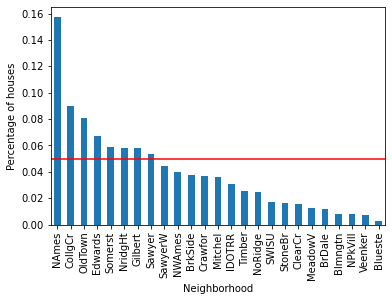

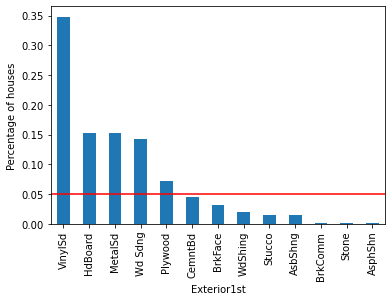

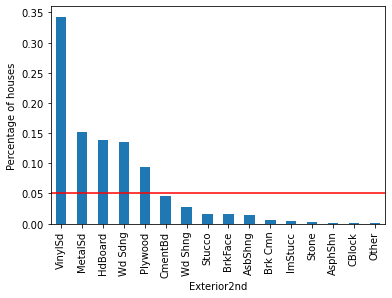

In [7]:
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

## Re-grouping rare labels with pandas

In [8]:
def find_non_rare_labels(df, variable, tolerance):
    temp = df.groupby([variable])[variable].count() / len(df)
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    return non_rare

**Non rare labels!**

In [9]:
find_non_rare_labels(X_train, 'Neighborhood', 0.05)

['CollgCr',
 'Edwards',
 'Gilbert',
 'NAmes',
 'NridgHt',
 'OldTown',
 'Sawyer',
 'Somerst']

**Rare labels!**

In [10]:
[x for x in X_train['Neighborhood'].unique(
) if x not in find_non_rare_labels(X_train, 'Neighborhood', 0.05)]

['BrkSide',
 'Veenker',
 'ClearCr',
 'Timber',
 'NWAmes',
 'SawyerW',
 'Crawfor',
 'Mitchel',
 'IDOTRR',
 'StoneBr',
 'Blmngtn',
 'MeadowV',
 'SWISU',
 'BrDale',
 'NoRidge',
 'NPkVill',
 'Blueste']

**Find the most frequent category! Re-group rare labels!**

for variable in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    X_train, X_test = rare_encoder(X_train, X_test, variable, 0.05)

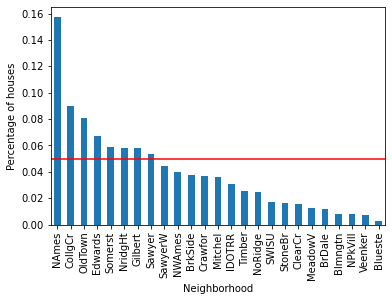

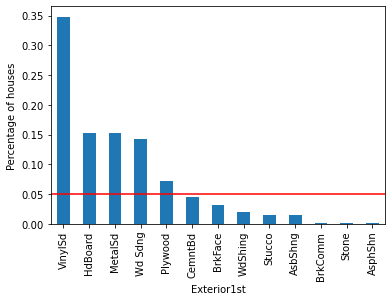

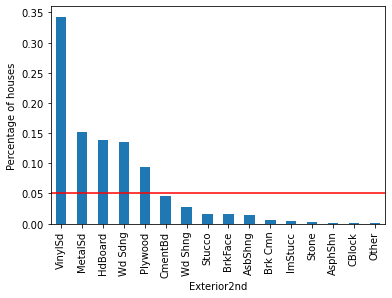

In [13]:
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )
    fig = temp_df.sort_values(ascending=False).plot.bar() # Plot with percentages!
    fig.set_xlabel(col)
    fig.axhline(y=0.05, color='red') # The threshold line at 5 % for rare categories!
    fig.set_ylabel('Percentage of houses')
    plt.show()

And now let's encode the low cardinal variables.

**Plot with the percentages! Add a line at 5 % to flag the threshold for rare categories!**

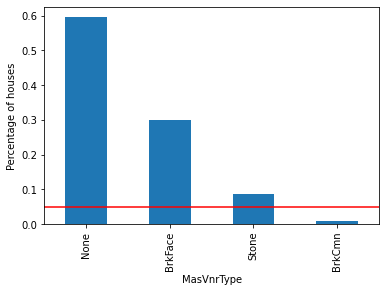

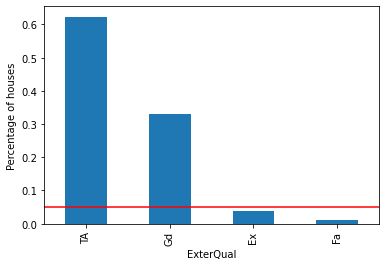

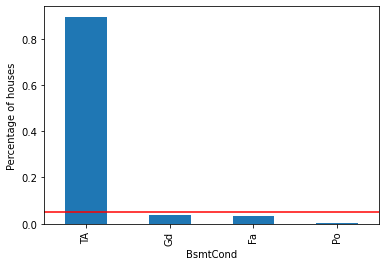

In [14]:
for col in ['MasVnrType', 'ExterQual', 'BsmtCond']:
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

## Encoding Rare Labels with Feature-Engine

In [15]:
from feature_engine.encoding import RareLabelEncoder

**Devide into train and test set!**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1), # predictors
    data.SalePrice, # target
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((2043, 80), (876, 80))

**Rare value encoder!**

In [17]:
rare_encoder = RareLabelEncoder(
    tol=0.05,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal category number to group for the rare variable!
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd',
               'MasVnrType', 'ExterQual', 'BsmtCond']) # variables to re-group

In [18]:
rare_encoder.fit(X_train.fillna('Missing'))

C:\Users\husey\anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:161: UserWarning: The number of unique categories for variable ExterQual is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


RareLabelEncoder(n_categories=4,
                 variables=['Neighborhood', 'Exterior1st', 'Exterior2nd',
                            'MasVnrType', 'ExterQual', 'BsmtCond'])

Note how the encoder is warning us that the variable **ExterQual** contains less than 4 categories, and thus, categories will not be regrouped under Rare, even if the percentage of observations is less than 0.05.

In [19]:
rare_encoder.variables_

['Neighborhood',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'BsmtCond']

**The encoder_dict_ is a dictionary of variable: frequent labels pair**

In [20]:
rare_encoder.encoder_dict_

{'Neighborhood': Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'NridgHt',
        'Gilbert', 'Sawyer'],
       dtype='object'),
 'Exterior1st': Index(['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood'], dtype='object'),
 'Exterior2nd': Index(['VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood'], dtype='object'),
 'MasVnrType': Index(['None', 'BrkFace', 'Stone'], dtype='object'),
 'ExterQual': array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object),
 'BsmtCond': Index(['TA'], dtype='object')}

In [21]:
X_train = rare_encoder.transform(X_train.fillna('Missing'))
X_test = rare_encoder.transform(X_test.fillna('Missing'))